In [7]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import IPython.display as ipd
import numpy as np
%matplotlib notebook
from scipy.signal import lfilter

Phasor 

In [8]:
#parameter setting  # prat 에서 pure tone만드는겇럼 똑같이 해보는거 
amp = 1     #range [0.0,1.0]
sr = 10000  # sampling rate, Hz # 1초에 몇개의 숫자로 얼마나 고해상도로 하는가 . 1초에 만개의 숫자로 표현 
dur = 0.5   # in seconds #몇초동안 소리가 나느냐 
freq = 100.0 # sine frequency, Hz # 1초에 몇번 왔다갔다 

In [9]:
theta = np.arange(0,2*np.pi, 0.1)#각도를 만들어냄. 0부터 2파이까지 한바퀴를 만드는것. 각도의 베타를 만든다. 사인곡선이 나옴. 
theta               # 젤 첫번째 값은 0, 마지막 값은 2*pi 이파이 . np안에 파이값이 들어있음. 6,28 이고 1만큼 implemnet되서.
# 0,1 하면 100배. 빽빽해짐. 
# theta 는 radian으로 정의.  # 끝나는점이 10파이라면 총 5번 돔. 2*np.pi*5

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [10]:
s = np.sin(theta) # 사인합수에 넣음. 총 7개의 백타값이 나옴. 
s

array([ 0.        ,  0.09983342,  0.19866933,  0.29552021,  0.38941834,
        0.47942554,  0.56464247,  0.64421769,  0.71735609,  0.78332691,
        0.84147098,  0.89120736,  0.93203909,  0.96355819,  0.98544973,
        0.99749499,  0.9995736 ,  0.99166481,  0.97384763,  0.94630009,
        0.90929743,  0.86320937,  0.8084964 ,  0.74570521,  0.67546318,
        0.59847214,  0.51550137,  0.42737988,  0.33498815,  0.23924933,
        0.14112001,  0.04158066, -0.05837414, -0.15774569, -0.2555411 ,
       -0.35078323, -0.44252044, -0.52983614, -0.61185789, -0.68776616,
       -0.7568025 , -0.81827711, -0.87157577, -0.91616594, -0.95160207,
       -0.97753012, -0.993691  , -0.99992326, -0.99616461, -0.98245261,
       -0.95892427, -0.92581468, -0.88345466, -0.83226744, -0.77276449,
       -0.70554033, -0.63126664, -0.55068554, -0.46460218, -0.37387666,
       -0.2794155 , -0.1821625 , -0.0830894 ])

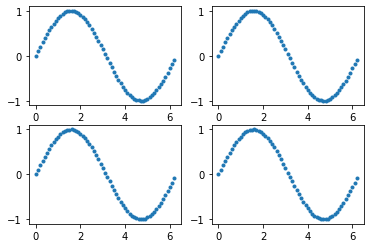

In [11]:
fig = plt.figure() # figure를 만들고 거기 담긴 add subplot. 
ax = fig.add_subplot(221) #figure는 화면 전체를 말하고 
ax.plot(theta, s, '.') #subplot 화면분리를 해서 subplot을 만들수있음. 221은 총 2by 2로 나눔.- 줄이 두줄. 열도 두 열로 화면분리. 중에 첫째걸로 선택을 한다  
ax = fig.add_subplot(222) #figure는 화면 전체를 말하고 
ax.plot(theta, s, '.') # theta가 0부터 2파이까지 각도값- x축. s는 그것을 다시 사인이란 펑션을 통과시켜 나온 결과값. 개수는 대응 총 7개. 
#0,0 1, 2.. y축은 사인함수의 결과. 웨이브 모양 - 사인함수의 결과. 좀 더 빽빽하게 만들려면 /1만큼 띄우지 않고 더 작게 만들면 됨. 
ax = fig.add_subplot(223) #figure는 화면 전체를 말하고 
ax.plot(theta, s, '.')
ax = fig.add_subplot(224) #figure는 화면 전체를 말하고 
ax.plot(theta, s, '.')

Text(0, 0.5, 'value')

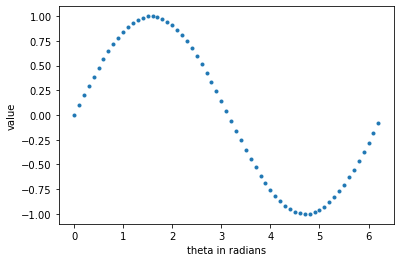

In [12]:
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.plot(theta, s, '.') # f라인으로 나타내고 싶은경우 '-'. 디폴트는 라인. 
ax.set_xlabel('theta in radians') # x축의 이름을 달아줄때. 각도값 / 0부터 2파이. 
ax.set_ylabel('value') #y축에서 equidistance? 하지않음. x축에서는 함. - 어떤 경우에 그럴까 ) linear한경우에 그렇고 linear하지 않은경우 그렇지 않음 
# 밑에 그림은 line같이 생기지 않음. (직선인 경우 둘다 eqi) linear- 1차함수. y=2x . 밑에건 non-linear . xy의 관계가 line이 아니다 .
# 그것을 제외한 모든 함수는 다 non-linear. y= ax제곱, 사인, 로그.. . / x간의 거리는 eqi하게 만듬. 그것에 corresponding하는거는 거리가
#먼곳도 있고 거리가 촘촘한 구간도 있음. y에는 eqi성격이 반영되지 않는다. 

In [13]:
t 0.0001 0.0002 0.0003... 0.5000 #time  0.5 까지 만들면됨. 1초에 만개가 들어가야. 0.5가 duration 

SyntaxError: invalid syntax (<ipython-input-13-49492a02f39e>, line 1)

지금까지 theta를 변화시키면서 sin에 넣으면서 어떻게 플래팅이 되는지. sin이 어떤역할을 하는지 봄, 
시간이 빠져있음. 소리라는건 시간의 개념이 빠지면 만들어질수없음. 소리는 시간이 있어야 함. 
~이만큼이 만약 1초라면, 이라는걸 해줘야함. 

In [ ]:
t = np.arange(1,sr*dur+1/sr) # 시간을 만듬. 1초에 time tick 의 개수는 sr과 일치. (1, sr)이렇게 하면 sr만큼의 time tick 을 만드는 것. 
#1초가 아닌 경우 그것보다 작아져야함. dur이 1초면 1, 0.5 초면 0.5 
# 이 자체가 시간은 아니고 첫번째 tine tick, 두번째 time tick해서 index를 준거고 그게 초로 바뀔려면 sr으로 나눠줘야 
# 만개의 timetick 을 만들었는데 만개로 나누면 1이되는것. 만번째가 1초가 되는것. 젤 첫째 time tick 초부터 1초까지 만들어지는것. 
#arange라는 펑션이 맨 마지막걸 배제해서 +1 
# time 하고 연결된 theta를 만드는 작업을 할것. 

In [ ]:
# generate time
t = np.arange(1, sr * dur+1)/sr # dur곱하면 0.5까지 time tick을 만들어줘. 5000까지 만듬. 1부터 5000까지 time tick 은 
                                # 만들어주는데 실제 time은 아님. sr로 나누어주면 / 오천까지 만들고 sr로 나누면 만분의 1초부터 
             # 0.5 초까지 만들어짐 (나누기 만) 이정도 해상도로 time을 만드는 
        #time을 먼저 만들고. 세타에 들어가는 phase. 각도값을 만들어내야하는데 time과 연동시켜서 phase로 바꾸어줘야 

In [ ]:
t # 1에 e -0.4 10 의 4승. 1곱하기 만분의 1 - 만분의 일초 

In [ ]:
# generate phase
theta = t * 2*np.pi * freq  # time에 2파이를 곱함  np.pi : 상수값 . time 이 0에서 1까지 만들어졌다고 생각. 
 # 1초에서의 time값은 1. 거기에 2파이를 곱하면 2파이. 0초에서 1초까지 있는데 2파이를 곱하면 0에서 이파이까지. 한ㅂ퀴 도는것. 
     # frequency가 1이면 한바퀴돌고 끝. 2파이가 총 몇개 있어야하는가에 대한 정의. 
        #time을 먼저 만들고 거기에 phase를 연동. time과 각도개념이 동시에 있는것. 
       
 #time을 가지고 theta를 연결시킴.freq가 없다 고 생각하고 t을 1이라고 생각하면. 거기다 이파이를 곱하면 / 1초동안 한바퀴 도는걸 만들어라.몇바퀴도는지  
 # 100바퀴 돌려고 만들려면 freq. / time연동을 안하면 arbitrary 하게 만드는 theta. 

In [ ]:
# generate signal by cosine-phasor
s = amp*np.sin(theta) # time 백타의 사이즈 과 theta의 백타의 사이즈는 같다 ? - o . 
#만분의 1부터 5000초 (오천개) 와 곱하기 해서 들어있는 . 똑같은 개수의 백터가 세타에 들어있는. 
# ~1 부터 1. ~2부터 2를 만들고싶으면 곱하기 2. amp* 를 앞에 하면 증폭. 

In [ ]:
fig = plt.figure() # 
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.') # 하나는 타임을 넣어 x라고 하고 s를 y로 해서 플래팅. 점으로. # 하나의 점이 t콤마 s. 
 #점들의 개수 ? - 천개. / t, s의 개수가 맞아야함. 
ax.set_xlabel('time (s)')  # x축은 타임. 첫번째부터 총 오천개. 총 천개만 플래팅. s도 천개만. 
ax.set_ylabel('real') # 사인 곡선은 0부터 시작 
# theta 가 어떻게 변하느냐-한바퀴가 2파이고 2바퀴가 4파이인데 . 그게 몇초동안의 흐름이 있는가가 관심. 
# > x축에 굳이 theta안쓰고 time을 씀. 


In [ ]:
# generate signal by complex-phasor
c = np.exp(theta*1j) # exp - 오일러 / np. exp를 e라는 숫자로 생각. 1J 는 i. e에다가 theta 곱하기 i가 작동. 
c # c- complex / ...으로 생략되있음 a+bi의 형태로 되있음. e-01은 -01이 십분의 일. -02면 10의 제곱분의 1. (소숫점을 어디로 옮기느냐)
#아무리 크고 작은 수든 저런형태라 정보량이 똑같다 쓰는 숫자가 똑같다. c에는 complex넘버 복소수의 벡타가 쭉 있음 
# 왜 복소수가 들어왔냐면 i를 썻기 때문에 실수 범위 넘어 복소수까지 확대. 

<IPython.core.display.Javascript object>


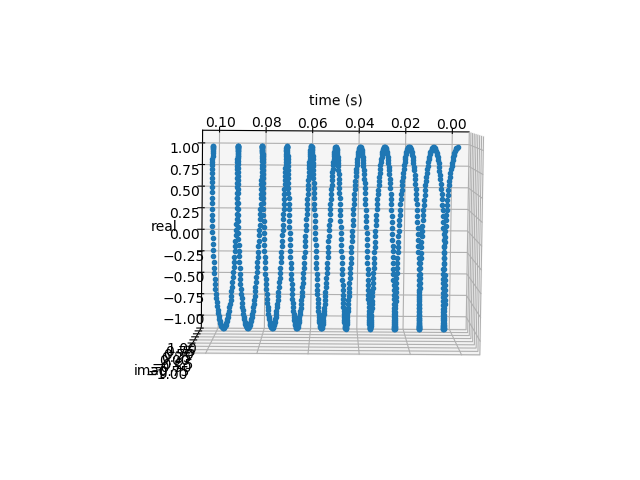

Text(0.5, 0, 'imag')

In [62]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') #3d로 만듬 . 
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.') #3개의 입력이 들어감. 밑에 한 점이 머 콤마 머 콤마머 해서 3차원. 3차원의 백타
# t에서 첫번째거 c에서 첫번째거 imag에서 첫번째거가 한점이되서 총 천개의 점이 찍힘. 
# c의 값들은 다 복소수. a +bi - a,b 두개의 정보가 있는것. 
# a값에 해당되는게 real. b- imag. complex number의 백터들에서 real, imag를 따로따로 받아와서 플랫을 한다. 
ax.set_xlabel('time (s)') 
ax.set_ylabel('real')
ax.set_zlabel('imag')

cos 부분은 real 과 관련, sin은 imag 와 관련  
real만 볼려면 위에서 보면 real만 보는셈. time은 늘 보는거고. 
imag - 사인 곡선이나옴. 

In [23]:
ipd.Audio(s, rate=sr) # s 사인함수 sr을 적어줘야해. 정의를 안하면 소리의 실체가 없어. 
# ipd위에서 import했음 오디오 플레이 하기 위해서.  원하는 sr( 만)를 적어줘 . (c.imag, rate=sr)해도 같음. sin이랑 같으니

python 의 sub 라이브러리 display 내의 오디오라는 함수. 

In [5]:
#!pyt install sounddevice #이걸 깔아줘야 . 이 부분 물어보기 ) 
import sounddevice as sd
sd.play(c.real,sr) 

'pyt'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


NameError: name 'c' is not defined

Generate pulse train 

theta 만 있어도 sin cos 이 만들어지긴 하지만 실제 소리를 만들순없다 ( 시간의 개념이 반드시 필요 ) 


<IPython.core.display.Javascript object>


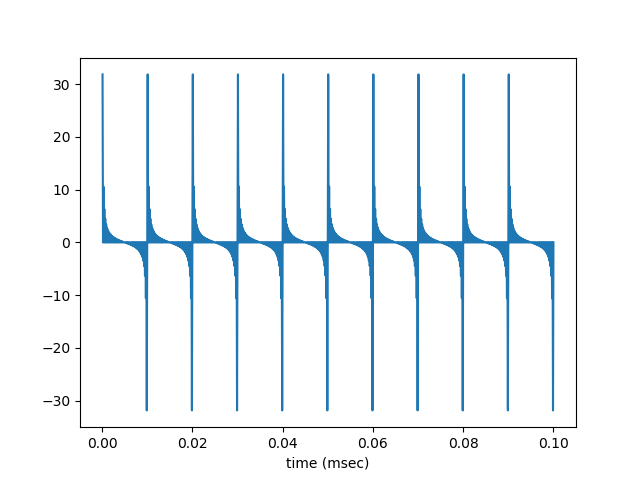

In [36]:
# generate samples, note conversion to float32 array
F0 = 100; Fend = int(sr/2); s = np.zeros(len(t));
for freq in range(F0, Fend+1, F0):
    theta = t * 2*np.pi * freq
    tmp = amp * np.sin(theta)
    s = s + tmp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000]); 
ax.set_xlabel('time (msec)')
ipd.Audio(s, rate=sr)

11/12 
사인하고 코사인이 phasor 그 인풋은 각도값 레디언 . time을 연동을 시켜야 소리로 가능. 

In [45]:
# !pip install sounddevice
import sounddevice as sd 
sd.play(c.real,sr)

Generate pulse train 
성대에서 만들어지는 소리랑 똑같은 걸 만드는작업 
F0 먼저 정하고 배음을 얹어감. 
sr하고 frequency : sr이 100hz라고 생각. - 표현할수 있는 숫자의 개수가 1초에 100개. 100개의 숫자를 가지고 1hz fre를 표현할 수 있을까? - 네. 
ㅇ한번의 사인웨이브의 주기가 있으면 됨. 2hz 는? 두번 왔다갔다. 만 hz 가능? 1초동안 만번을 왔다갔다 . 주어진 숫자는 백개. 표현가능할까? 안됨. sr이 1초에 ㅊ충분히 있어야 그만큼의 주파수를 표현할수있다. 